# Lecture 7 - The Bias-Variance Trade-Off; Bayesian Interpretation

In [4]:
import numpy as np
import numpy.random as npr

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')
    
from IPython.display import Image 

In [5]:
def PolynomialRegression(x,t,M):
    X = np.array([x**m for m in range(M+1)]).T
    w = np.linalg.inv(X.T@X)@X.T@t
    y = X@w
    error = t-y
    return w, y, error

def PolynomialRegression_test(x,M,w):
    X = np.array([x**m for m in range(M+1)]).T 
    y = X@w
    return y

def NoisySinusoidalData(N, a, b, gVar):
    x = np.linspace(a,b,N)
    noise = npr.normal(0,gVar,N) 
    t = np.sin(2*np.pi*x) + noise
    return x, t

## Regularization

<div class="alert alert-info">
    <b>Regularized Least Squares</b> 

We fit the linear regression model such that the *regularized* objective function $J(\mathbf{w})$ is minimized:

$$\arg_{\mathbf{w}}\min J(\mathbf{w})$$
    
where   
    
\begin{align} 
J(\mathbf{w}) &= J_D(\mathbf{w}) + \lambda J_W(\mathbf{w}) \\
&= \frac{1}{2} \left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2 + \frac{\lambda}{2}\left\Vert\mathbf{w}\right\Vert_2^2
\end{align}

This is often referred to as the **ridge regression**. The optimal solution $\mathbf{w}^*$ is:

$$\mathbf{w}^* = \left(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I}\right)^{-1}\mathbf{X}^T\mathbf{t} $$

where $\mathbf{I}$ is an identity matrix of size $(M+1)\times (M+1)$.
</div>

* We are **diagonally loading** the matrix $\mathbf{X}^T\mathbf{X}$ with the regularizer term $\lambda$.
* This is "filling" the feature space such that the matrix $\mathbf{X}^T\mathbf{X}$ becomes full rank.
* What happens when $\lambda \rightarrow \infty$?

* In code, how would you change the function ```PolynomialRegression``` created above to include the regularization term?

In [6]:
def PolynomialRegression_reg(x,t,M,lam):
    X = np.array([x**m for m in range(M+1)]).T
    w = np.linalg.inv(X.T@X + lam*np.eye(M+1))@X.T@t
    y = X@w
    error = t-y
    return w, y, error

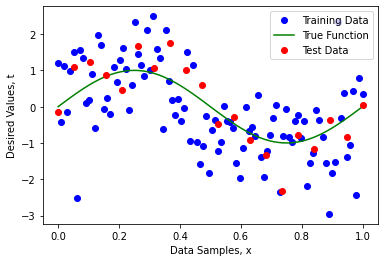

In [7]:
N = 100
Ntest = 20 
a, b = [0,1] 
gVar_train = 1
gVar_test = 0.5 
x1, t1 = NoisySinusoidalData(N, a, b, gVar_train) 
x2, t2 = NoisySinusoidalData(N, a, b, 0)
x3, t3 = NoisySinusoidalData(Ntest, a, b, gVar_test)

plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x2,t2,'g', label = 'True Function')
plt.plot(x3,t3,'ro', label = 'Test Data')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

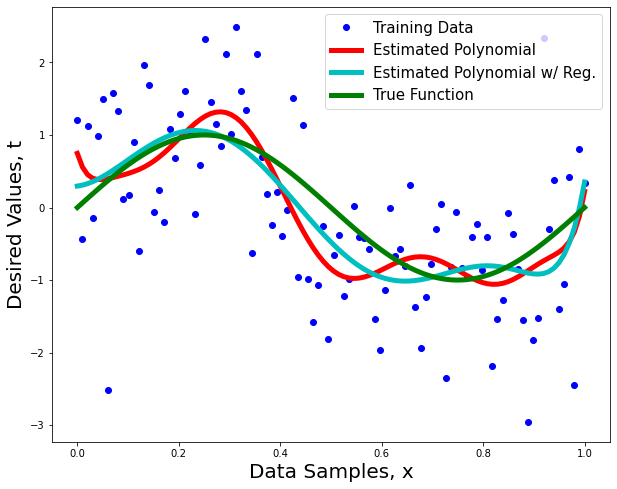

In [16]:
M = 10
lam = 0.00001

_, y, _ = PolynomialRegression(x1,t1,M) 
_, yreg, _ = PolynomialRegression_reg(x1,t1,M,lam) 

fig=plt.figure(figsize=(10,8))
plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x1,y,'r',linewidth=5, label = 'Estimated Polynomial')
plt.plot(x1,yreg,'c',linewidth=5, label = 'Estimated Polynomial w/ Reg.')
plt.plot(x2,t2,'g',linewidth=5, label = 'True Function')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, x', fontsize=20)
plt.ylabel('Desired Values, t', fontsize=20);

* What are the parameters we can control now? <!--Model order $M$ and regularizer weight $\lambda$-->

**<font color=red>Important:</font> In practice, when computing $(\mathbf{X}^T\mathbf{X})^{-1}$, if you receive an *error: matrix is singular*, what do you do?**

## Basis Functions

So far, we have assumed that we have form a **feature matrix** $\mathbf{X}$ of dimensions $N \times (M+1)$, where $N$ is the number of samples and $M$ the number of coefficients.

* In Polynomial Regression, we constructed this matrix with a polynomial representation of each data sample:

$$\phi(x_i) = [x_i^0, x_i^1, \cdots, x_i^M]^T$$

In practice, we can use other types of features. But, from a software implementation point-of-view, regardless of the features used, we always want to have them in a tidy feature matrix $\mathbf{X}$:

$$\mathbf{X} =\left[\begin{array}{c} \phi(x_1)^T \\ \phi(x_2)^T \\ \vdots \\ \phi(x_N)^T \end{array}\right]  = \left[\begin{array}{ccccc}
1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{M}\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{M}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{M}
\end{array}\right] \in \mathbb{R}^{N\times (M+1)}$$

* In mathematics, the polynomial feature representation that we have used is called a **polynomial basis function** and is a basis of a polynomial ring.

* We can also implement the **Linear Regression** model using other feature representations, also called **basis functions** $\phi(\mathbf{x})$. 

    * **Assumption:** we are assuming that true *unknown* function $f(x)$ can be modeled by at least one of the functions $\phi(\mathbf{x})$ that can be represented by a linear combination of the basis functions, i.e., by one function in the function class under consideration.
    
    * If we include **too few** basis functions or unsuitable basis functions, we might not be able to model the true dependency. Similarly to polynomial features, the more we added, the better fit we have to out training data.
    
    * If we include **too many** basis functions, we need many data points to fit all the unknown parameters.
        * There are special function space (Reproducing Kernel Hilbert Space or RKHS) where we can have an *infinite* number of basis functions (called kernels) and still have good generalization.
    
    * What we control? Which basis functions to use, how many to use, and any other parameters they have.

Some examples include:

1. **Radial Basis Functions**

Another class of basis functions are radial basis functions (RBF). Typical representatives are Gaussian basis functions:

$$\phi_j(x) = \exp\left\{-\frac{(x-\mu_j)^2)}{2s_j^2}\right\}$$

In [14]:
def RBF(x,m,s):
    return np.exp(- (x-m)**2/(2*s**2))

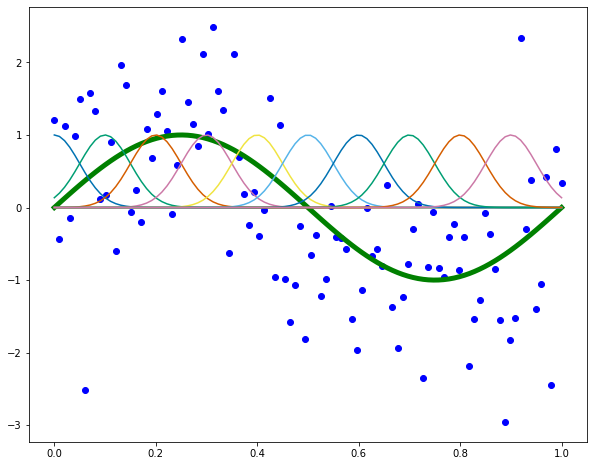

In [15]:
M = 10
m = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
s = [0.05]*10

fig = plt.figure(figsize=(10,8))
plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x2,t2,'g',linewidth=5, label = 'True Function')
for i in range(M):
    plt.plot(x1, RBF(x1,m[i],s[i]));

Given these basis functions, we need to:
1. compute the weight value that each one has in representing the underlying function $f(x)$
2. estimate the parameters of each basis function, in particular, the mean $\mu$ and standard deviation $\sigma$ for each Gaussian function.

We will see exactly how to do this when we study **Gaussian Mixture Models (GMMs)**, but we are not quite ready yet...

2. **Fourier Basis functions**

3. **Wavelet Basis functions**

4. and many others

## The Bias-Variance Trade-Off

Regardless of the form and number of the basis functions, we still face the problem of **overfitting**. In fact, this is true for any ML model.

The problem of searching for *optimal* model complexity has been extensively studied; in fact, we are *simply* searching for a level of complexity that fits the data *well* yet *not too well*. This phenomenon can be summarized by the **bias-variance trade-off** of complexity.

<div class="alert alert-info">
    <b>The Bias-Variance Trade-Off</b> 

The bias-variance trade-off is a way of analyzing a learning algorithm's expected generalization error with respect to a particular problem as a sum of three terms, the bias, variance, and a quantity called the irreducible error, resulting from noise in the problem itself.
</div>

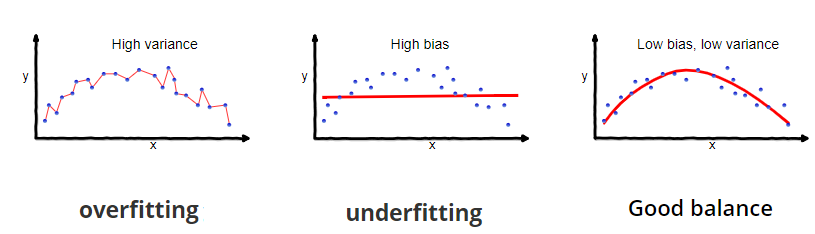

In [3]:
Image('figures/BiasvsVariance.png',width=800)

Consider the cost function:

$$J(\mathbf{x},\mathbf{w}) = \frac{1}{2} \Vert \mathbf{t} - \mathbf{y}\Vert_2^2$$

where $\mathbf{y} = \sum_{j=0}^{M} w_j\phi_j(\mathbf{x})$

We can model each $J$ as a random variable, and so its expected value, over some data set $D$, is given by:

\begin{align}
E\left[J(\mathbf{x},\mathbf{w})\right] &= E\left[\frac{1}{2} \Vert \mathbf{t} - \mathbf{y}\Vert_2^2\right] \\
&=E\left[(\mathbf{t} - \mathbf{y})^2\right]
\end{align}

where $\mathbf{y}$ is the model and $\mathbf{t}$ is the desired response. For the experimental design section, we learned that this quantity dependent on the particular data set $D$. And so, we can take its average over the ensemble of data sets. If we add and subtract the quantity $E_D[\mathbf{y}]$.

* In practice we really only have access to $E_D[\mathbf{y}]$
* But $\mathbf{y}$ here, is simply representing the model *if* we had an *infinite* amount of data and could effectively represent it.

\begin{align}
E\left[(\mathbf{t} - \mathbf{y})^2\right] &= E\left[(\mathbf{t} - E_D[\mathbf{y}] + E_D[\mathbf{y}] - \mathbf{y})^2\right]\\
&= E\left[(\mathbf{t} - E_D[\mathbf{y}])^2\right] + E\left[(E_D[\mathbf{y}] - \mathbf{y})^2\right] + E\left[2(\mathbf{t} - E_D[\mathbf{y}])(E_D[\mathbf{y}] - \mathbf{y})\right]\\
&= \text{variance } +  \text{bias } +  \text{irreducible error} 
\end{align}

# Bayesian Interpretation - The Evidence Approximation

We can look at the **Regularized Least Squares** in the "Objective Function world", where we simply add a term to our objective in order to prevent overfitting and, consequently, allow the model to generalize to unseen and unkown data.

Another way to look at Regularized Least Squares is from a Bayesian point-of-view. To see this, let's look at our objective function:

\begin{align}
& \arg_{\mathbf{w}}\min \left(J(\mathbf{w})\right) \\
= & \arg_{\mathbf{w}}\max \left(- J(\mathbf{w})\right) \\
= & \arg_{\mathbf{w}}\max \left(\exp\left(- J(\mathbf{w})\right)\right) \text{, }\exp(\bullet)\text{ is a monotonic function}  
\end{align}

where

$$J(\mathbf{w})= \frac{1}{2}\sum_{n=1}^N \left(t_n - y_n\right)^2 - \frac{\lambda}{2} \sum_{i=0}^M w_i^2$$
and, consider e.g. the polynomial model (this could be *any* model)
$$y_n = \sum_{j=0}^M w_jx_n^j$$

Then,

\begin{align}
& \arg_{\mathbf{w}}\max \left(\exp\left(-\frac{1}{2}\sum_{n=1}^N \left(t_n - y_n\right)^2 - \frac{\lambda}{2} \sum_{i=0}^M w_i^2)\right)\right) \\
= & \arg_{\mathbf{w}}\max \left(\exp\left(-\frac{1}{2}\sum_{n=1}^N \left(t_n - y_n\right)^2\right) \exp\left(- \frac{\lambda}{2} \sum_{i=0}^M w_i^2)\right)\right) \\
=& \arg_{\mathbf{w}}\max \left(\prod_{n=1}^N \exp\left(-\frac{1}{2}\left(t_n - y_n\right)^2\right) \prod_{i=0}^M \exp \left(-\frac{\lambda}{2} w_i^2\right) \right)\text{, assuming the data }\{(x_n,t_n)\}_{n=1}^N\text{ is i.i.d.}  \\
\approx & \arg_{\mathbf{w}}\max \mathcal{N}\left(\mathbf{t}| \mathbf{y}, 1\right) \mathcal{N}\left(0, 1/\lambda\right) \\
=& \arg_{\mathbf{w}}\max p(\mathbf{t}|\mathbf{w}) p(\mathbf{w}) \\
=& \arg_{\mathbf{w}}\max p(\mathbf{w}|\mathbf{t}) p(\mathbf{t}), \text{ using Bayes' Rule} \\
\propto & \arg_{\mathbf{w}}\max p(\mathbf{w}|\mathbf{t}), p(\mathbf{t})\text{ is constant for some fixed training set}  
\end{align}

where $p(\mathbf{t}|\mathbf{w})$ is known as the **data likelihood**, $p(\mathbf{w})$ is known as the **prior** on the parameters, and $p(\mathbf{w}|\mathbf{t})$ is the **posterior probability**.

In Machine Learning, this result is known as the **evidence approximation**.

* In practice, this means that we now can rewrite the Regularized Least Squares problem as the product between the *data likelihood* and a *prior distribution* on the parameters. 

    * In particular, for Least Squares cost function and an L2- regularization term, both distributions (likelihood's and prior's) follow a Gaussian distribution.
    
* Now, we can select **any** distribution function to our data and control the regularization also using a probabilistic model!

* **What is the shape of the prior distribution if we had considered the L1-norm or the Lasso regularizer?**